In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

# RETRIEVING AND BASIC FORMATTING EXCEL FILES

## Retrieving the .xlsx files
Find the directory where the excel files are living. 

Then **'excel_files'** will report what lives inside the folder. 

Note: Any additional excel files you want analysed will need to be put into the same location as **'directory'.**

In [3]:
directory = r"\\dc2-file001\Practice\InfoTech\BIM\Revit\RevitStandardsMasterBVN\02_BVN_Library\Master Content\X_Data\Data - ARR\_CONSOLIDATED v3"
files = os.listdir(directory)
excel_files = []
for f in files:
    if ".xlsx" in f:
        excel_files.append(f)
excel_files

['20170706 12_20 Family Types Log.xlsx',
 '20170706 12_20 FamilyCategory Log.xlsx',
 '20170706 12_20 FamilySubCategory Log.xlsx',
 '20170706 12_20 Host Families Log.xlsx',
 '20170706 12_20 Materials Log.xlsx',
 '20170706 12_20 Nested Families Log.xlsx',
 '20170706 12_20 OmniClass Log.xlsx',
 '20170706 12_20 Parameters Log.xlsx',
 '20170706 12_20 ParameterValuesByTypes Log.xlsx',
 '20170706 12_20 Reference Planes Log.xlsx',
 '20170706 12_20 Units Log.xlsx']

## xlsx. key and values

Use <b>keys</b> to pair each key with each excel file in <b>excel_files</b>. This is so that you don't have to type the long file name everytime you need to call it in the rest of the code. 

<b>file_dict</b> will tell you which excel file is paired with each key.

In [4]:
keys = [
        "FamilyTypes",
        "FamilyCategory",
        "FamilySubCategory",
        "HostFamilies",
        "Materials",
        "Nested Families",
        "Omniclass",
        "Parameters",
        "ParameterValuesByTypes",
        "ReferencePlanes",
        "Units",
        
       ]

file_dict = {key: value for (key, value) in zip(keys, excel_files)}
file_dict

{'FamilyCategory': '20170706 12_20 FamilyCategory Log.xlsx',
 'FamilySubCategory': '20170706 12_20 FamilySubCategory Log.xlsx',
 'FamilyTypes': '20170706 12_20 Family Types Log.xlsx',
 'HostFamilies': '20170706 12_20 Host Families Log.xlsx',
 'Materials': '20170706 12_20 Materials Log.xlsx',
 'Nested Families': '20170706 12_20 Nested Families Log.xlsx',
 'Omniclass': '20170706 12_20 OmniClass Log.xlsx',
 'ParameterValuesByTypes': '20170706 12_20 ParameterValuesByTypes Log.xlsx',
 'Parameters': '20170706 12_20 Parameters Log.xlsx',
 'ReferencePlanes': '20170706 12_20 Reference Planes Log.xlsx',
 'Units': '20170706 12_20 Units Log.xlsx'}

## FUNCTIONS TO FORMAT EXCEL FILES

### Removing the common file path characters from original family file path name

The example file path below is very long. In order to cut the fat out of the long file path, the common characters from each file path is removed. 

\\dc2-file001\Practice\InfoTech\BIM\Revit\RevitStandardsMasterBVN\02_BVN_Library\Master Content\Windows\Double Hung\Double Hung_3 Panel.rfa

Therefore, the start of the file path <b>\\dc2-file001\Practice\InfoTech\BIM\Revit\RevitStandardsMasterBVN\02_BVN_Library\Master Content</b> is removed in every spreadsheet.

### Removing the rfa. name from FamilyFilePath.

In the excel files, the family name (.rfa) is part of the FamilyFilePath column.

e.g. \\dc2-file001\Practice\InfoTech\BIM\Revit\RevitStandardsMasterBVN\02_BVN_Library\Master Content\Windows\Special\<u>Window Lancet_basic.rfa</u>

### Determines whether the family is an .rfa or from a .txt catalogue file.

<b> remove_rfaName</b> removes the family name from the FamilyFilePath column. This allows us to find things such as the count of how many families there are within a particular master content folder. It splits the <b>full_filepath</b> path by each \ .

<b>joined_again</b> will join the file path back through the \ except for the last one. The new file path is appended on a FamilyFilePath column.

### Determines whether the family is an .rfa or from a .txt catalogue file.
<b>getFileType</b> removes the last three characters from the FamilyFilePath.

<b>stripFileType</b> removes the last four characters (including the '.') from the FamilyName.

In [5]:
commonPartofFilePath = len(r'\\dc2-file001\Practice\InfoTech\BIM\Revit\RevitStandardsMasterBVN\02_BVN_Library\Master Content')
print commonPartofFilePath
def stripCommonPath(row):
        return row.FamilyFilePath[commonPartofFilePath+1:]
    
def remove_rfaName(row):
    full_filepath = row.FamilyFilePath
    split = full_filepath.split("\\")[:-1]
    joined_again = ("\\".join(split))
    return  joined_again

def getFileType(row):
    return row.FamilyFilePath[-3:]

def stripFileType(row):
    return row.FamilyName[:-4]

95


# UNITS

**u_path** and **u** reads from the ParameterValuesByTypes excel file.

In [6]:
u_path = os.path.join(directory, file_dict["Units"])
u = pd.read_excel(u_path)

u["FamilyFilePath"] = u.apply(remove_rfaName, axis=1)
u["FamilyFilePath"] = u.apply(stripCommonPath, axis=1)
u["FamilyName"] = u.apply(stripFileType, axis=1)

u.head()

FamilyFilePath                 FamilyName    Unit  Accuracy  \
0  Windows\Structural  Window_Square Opening_WIN  Number  0.000001   
1  Windows\Structural  Window_Square Opening_WIN  Length  1.000000   
2  Windows\Structural  Window_Square Opening_WIN    Area  0.010000   
3  Windows\Structural  Window_Square Opening_WIN  Volume  0.010000   
4  Windows\Structural  Window_Square Opening_WIN   Angle  0.010000   

       UnitDisplay              UnitSymbol  
0          General                     n/a  
1      Millimeters              (UST_NONE)  
2    Square meters              (UST_NONE)  
3     Cubic meters              (UST_NONE)  
4  Decimal degrees  Â° (UST_DEGREE_SYMBOL)

## Units families are using

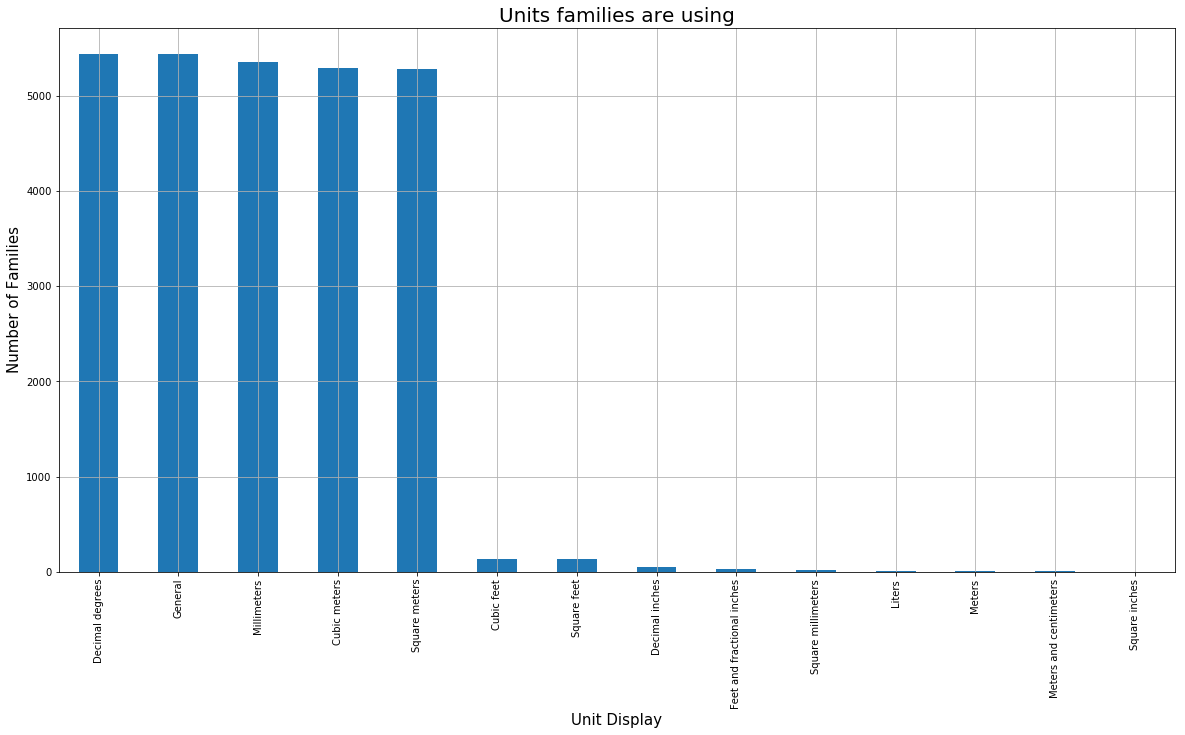

In [7]:
unit_group = u.groupby("UnitDisplay").agg("count")
unit_group.sort_values(by="FamilyName",ascending=False, inplace=True)

unit_group["FamilyName"].plot(kind="bar", grid=True);
plt.title("Units families are using", fontsize=20)
plt.xlabel("Unit Display", fontsize=15)
plt.ylabel("Number of Families", fontsize=15)
plt.show()

In [8]:
def get_unit_type(row):
    general_units = [u'General']

    metric_units = [u'Decimal degrees', 
                    u'Millimeters', 
                    u'Cubic meters',
                    u'Square meters', 
                    u'Square millimeters', 
                    u'Liters',
                    u'Meters', 
                    u'Meters and centimeters', ]

    us_evil_units = [u'Cubic feet',
                     u'Square feet',
                     u'Decimal inches',
                     u'Feet and fractional inches',
                     u'Square inches']
    if row.UnitDisplay in general_units:
        return "General"
    elif row.UnitDisplay in metric_units:
        return "Metric"
    elif row.UnitDisplay in us_evil_units:
        return "Evil"
    else:
        return "Alien"

In [9]:
u["unit_type"] = u.apply(get_unit_type, axis=1)
u.head()

FamilyFilePath                 FamilyName    Unit  Accuracy  \
0  Windows\Structural  Window_Square Opening_WIN  Number  0.000001   
1  Windows\Structural  Window_Square Opening_WIN  Length  1.000000   
2  Windows\Structural  Window_Square Opening_WIN    Area  0.010000   
3  Windows\Structural  Window_Square Opening_WIN  Volume  0.010000   
4  Windows\Structural  Window_Square Opening_WIN   Angle  0.010000   

       UnitDisplay              UnitSymbol unit_type  
0          General                     n/a   General  
1      Millimeters              (UST_NONE)    Metric  
2    Square meters              (UST_NONE)    Metric  
3     Cubic meters              (UST_NONE)    Metric  
4  Decimal degrees  Â° (UST_DEGREE_SYMBOL)    Metric

In [10]:
fams = u.FamilyName.unique()

def inline_units(name):
    this_fam = u[u.FamilyName == name]
    new_row = {"FamilyName": name,
               "Number_unit_type": list(this_fam[this_fam.Unit=="Number"].unit_type)[0],
               "Length_unit_type": list(this_fam[this_fam.Unit=="Length"].unit_type)[0],
               "Area_unit_type":   list(this_fam[this_fam.Unit=="Area"  ].unit_type)[0],
               "Volume_unit_type": list(this_fam[this_fam.Unit=="Volume"].unit_type)[0],
               "Angle_unit_type":  list(this_fam[this_fam.Unit=="Angle" ].unit_type)[0]}
    return new_row
    
f = pd.DataFrame([inline_units(f) for f in fams])

## Families that are using Metric AND imperial Units

In [11]:
m="Metric"
dirty_families = f[(f.Angle_unit_type!=m)|(f.Area_unit_type!=m)|(f.Length_unit_type!=m)|(f.Volume_unit_type!=m)]

dirty_families.head(141)

Angle_unit_type Area_unit_type  \
363           Metric           Evil   
371           Metric           Evil   
492           Metric           Evil   
499           Metric         Metric   
531           Metric           Evil   
538           Metric           Evil   
541           Metric           Evil   
553           Metric           Evil   
720           Metric           Evil   
725           Metric           Evil   
746           Metric           Evil   
758           Metric           Evil   
817           Metric           Evil   
818           Metric           Evil   
1784          Metric           Evil   
1788          Metric           Evil   
1799          Metric           Evil   
1800          Metric           Evil   
1803          Metric           Evil   
1821          Metric           Evil   
1874          Metric           Evil   
2527          Metric           Evil   
2531          Metric           Evil   
2537          Metric           Evil   
2538          Metric           Evil   
2542          Metric           Evil   
2549          Metric           Evil   
2572          Metric           Evil   
2579          Metric           Evil   
2585          Metric           Evil   
...              ...            ...   
3239          Metric           Evil   
3244          Metric           Evil   
3245          Metric           Evil   
3246          Metric           Evil   
3247          Metric           Evil   
3248          Metric           Evil   
3249          Metric           Evil   
3250          Metric           Evil   
3255          Metric           Evil   
3257          Metric           Evil   
3258          Metric           Evil   
3260          Metric           Evil   
3261          Metric           Evil   
3262          Metric           Evil   
3268          Metric           Evil   
3407          Metric           Evil   
3408          Metric           Evil   
3409          Metric         Metric   
4016          Metric           Evil   
4017          Metric           Evil   
4018          Metric           Evil   
4019          Metric           Evil   
4020          Metric           Evil   
4315          Metric           Evil   
4317          Metric           Evil   
4767          Metric           Evil   
5076          Metric           Evil   
5125          Metric           Evil   
5148          Metric           Evil   
5151          Metric           Evil   

                                             FamilyName Length_unit_type  \
363                                  Paper Shredder_SEQ           Metric   
371                                        Pool Cue_SEQ           Metric   
492                           Tennis Court (indoor)_SEQ             Evil   
499            RearFolding_Basketball_Backstop_1937_SEQ           Metric   
531                   Exercise Equipment - Step Machine           Metric   
538                            Elliptical Cross Trainer             Evil   
541                                Dumb Bells on a rack             Evil   
553                                   Barbell - Olympic           Metric   
720                                 Reece AFA  Flow_PLU           Metric   
725     Kitchen Sink 1 x Bowl+Drainer_Clark Candice_PLU           Metric   
746                             Chair_Informal_Meet_FUR             Evil   
758                           G_6305_SCU_Dishwasher_EEQ           Metric   
817                    Baluster_RailExtension_Start_BAL           Metric   
818                      Baluster_RailExtension_End_BAL           Metric   
1784                                  Tree_Round_3D_PLA           Metric   
1788                                Tree_Ellipse_3D_PLA           Metric   
1799                                Tree_Plan_08_2D_PLA           Metric   
1800                                Tree_Plan_07_2D_PLA           Metric   
1803                                Tree_Plan_04_2D_PLA           Metric   
1821                          Tree_2.5D_ 9.2_Medium_PLA           

There are {{dirty_families.shape[0]}} dirty families. {{(dict(dirty_families.Angle_unit_type.value_counts())["Metric"] / dirty_families.shape[0])*100}}% of angles are Metric.

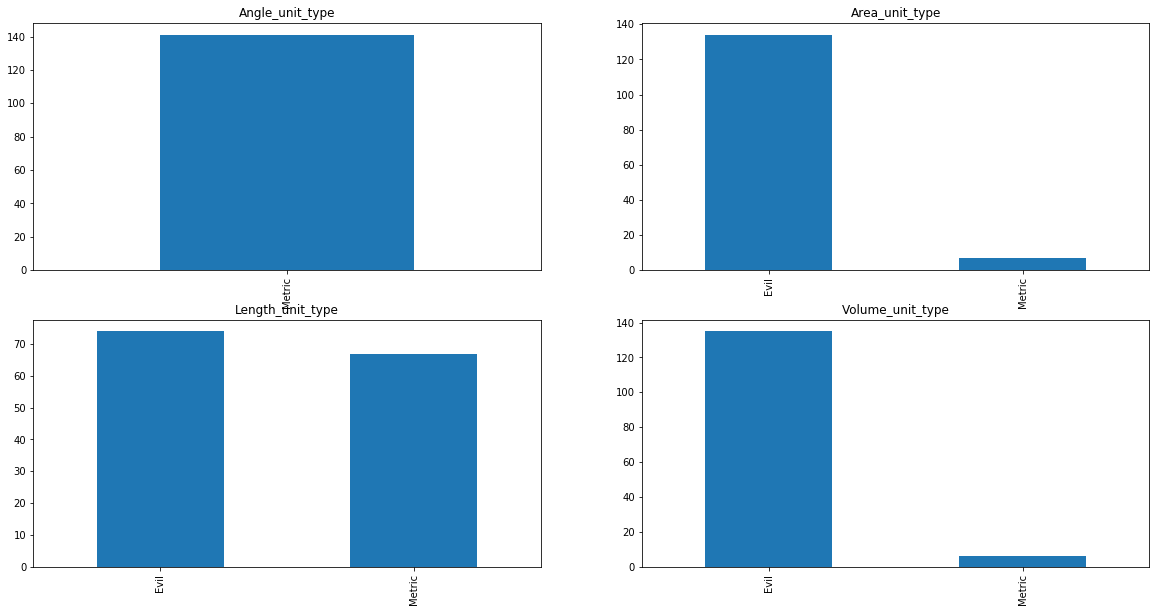

In [12]:
plt.figure(1)
for i, col in enumerate([u'Angle_unit_type', u'Area_unit_type', u'Length_unit_type', u'Volume_unit_type']):

    plt.subplot(221+i)
    dirty_families[col].value_counts().plot(kind="bar")
    plt.title(col)

plt.show()